# FastAPI EDA for Census Data

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import yaml

In [2]:
def load_config(config_path='config/config.yaml'):
    """
    Load the configuration from a YAML file.
    Parameters:
    - config_path (str): The path to the YAML configuration file. Default is 'config/config.yaml'.
    Returns:
    - dict: The loaded configuration as a dictionary.
    """

    with open(config_path, 'r') as file:
        config = yaml.safe_load(file)
    return config

# Load the configuration
config = load_config()

## Read in the data

In [3]:
data_path = config['data']['raw_data_path']
df = pd.read_csv(data_path)
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Checks and Cleaning
- Nulls
- Duplicates
- Outliers

In [4]:
df.isnull().mean().sort_values(ascending=False)

age                0.0
 workclass         0.0
 fnlgt             0.0
 education         0.0
 education-num     0.0
 marital-status    0.0
 occupation        0.0
 relationship      0.0
 race              0.0
 sex               0.0
 capital-gain      0.0
 capital-loss      0.0
 hours-per-week    0.0
 native-country    0.0
 salary            0.0
dtype: float64

In [5]:
df.duplicated().sum()

24

In [6]:
dups_df = df[df.duplicated()]
print(dups_df.shape)
dups_df

(24, 15)


,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [7]:
# Drop duplicates
print(df.shape)
df.drop_duplicates(inplace=True)
df.shape

(32561, 15)


(32537, 15)

In [8]:
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32537 non-null  int64 
 1    workclass       32537 non-null  object
 2    fnlgt           32537 non-null  int64 
 3    education       32537 non-null  object
 4    education-num   32537 non-null  int64 
 5    marital-status  32537 non-null  object
 6    occupation      32537 non-null  object
 7    relationship    32537 non-null  object
 8    race            32537 non-null  object
 9    sex             32537 non-null  object
 10   capital-gain    32537 non-null  int64 
 11   capital-loss    32537 non-null  int64 
 12   hours-per-week  32537 non-null  int64 
 13   native-country  32537 non-null  object
 14   salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [10]:
df.columns

Index(['age', ' workclass', ' fnlgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [11]:
# Remove all spaces from the column names
df.columns = df.columns.str.replace(' ', '')

# Also replace the '-' with '_'
df.columns = df.columns.str.replace('-', '_')
df.columns

Index(['age', 'workclass', 'fnlgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [12]:
describe_df = df.describe()
describe_df

,age,fnlgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
# Check and see if education-num is an ordinal version of education
education_sorted = df.groupby('education')['education_num'].agg(['min', 'max', lambda x: x.mode().iloc[0]]).reset_index()
education_sorted.sort_values('min')

,education,min,max,<lambda_0>
13,Preschool,1,1,1
3,1st-4th,2,2,2
4,5th-6th,3,3,3
5,7th-8th,4,4,4
6,9th,5,5,5
0,10th,6,6,6
1,11th,7,7,7
2,12th,8,8,8
11,HS-grad,9,9,9
15,Some-college,10,10,10


In [14]:
# drop education column
df.drop('education', axis=1, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'salary'],
      dtype='object')

In [15]:
# What are the unique values in fnlgt?
unique_values = df['fnlgt'].unique()
print(unique_values)

[ 77516  83311 215646 ...  34066  84661 257302]


In [16]:
# Value Counts
for column in df.select_dtypes(include='object').columns:
    print(f"Column: {column}")
    print("Value Counts:")
    print(df[column].value_counts())
    print("Unique Values:")
    print(df[column].unique())
    print()

Column: workclass
Value Counts:
workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
Unique Values:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Column: marital_status
Value Counts:
marital_status
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64
Unique Values:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Column: occupation
Value Counts:
occupation
 Prof-specialty       4136
 Craft-repair         4094
 Exec-

In [16]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [17]:
# Are the classes imbalanced?
df['salary'].value_counts()

salary
 <=50K    24698
 >50K      7839
Name: count, dtype: int64

## Feature Engineering
We won't do this here but in the main.py that we create we will do the feature engineering there. This should actually be a separate data cleaning step but ... due to the format of this project, we will just put it in main.py.
- One hot Encode workclass
- One hot encode marital_status
- One Hot encode occupation
- One Hot encode relationship
- One hot encode race
- One hot encode native_country
- Label encode salary to be 0 or 1. There are only two classes in this column (' <=50K' ' >50K')
- Balance the classes using class_weight in GBC

## Data Cleaning
- There are spaces in the start of many of these columns. I should strip the spaces from these column names. They are causing problems.
- According to instructions, one of the technologies does not like hyphens in column names, so change those to underscores.
- Drop education. It is redundant.
- Drop duplicates
- work_class, occupation, marital_status have leading spaces in each one of the sub categories. Remove those leading spaces.

c:\Users\Lindsay\anaconda3\envs\mldevops\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lindsay\anaconda3\envs\mldevops\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lindsay\anaconda3\envs\mldevops\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lindsay\anaconda3\envs\mldevops\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

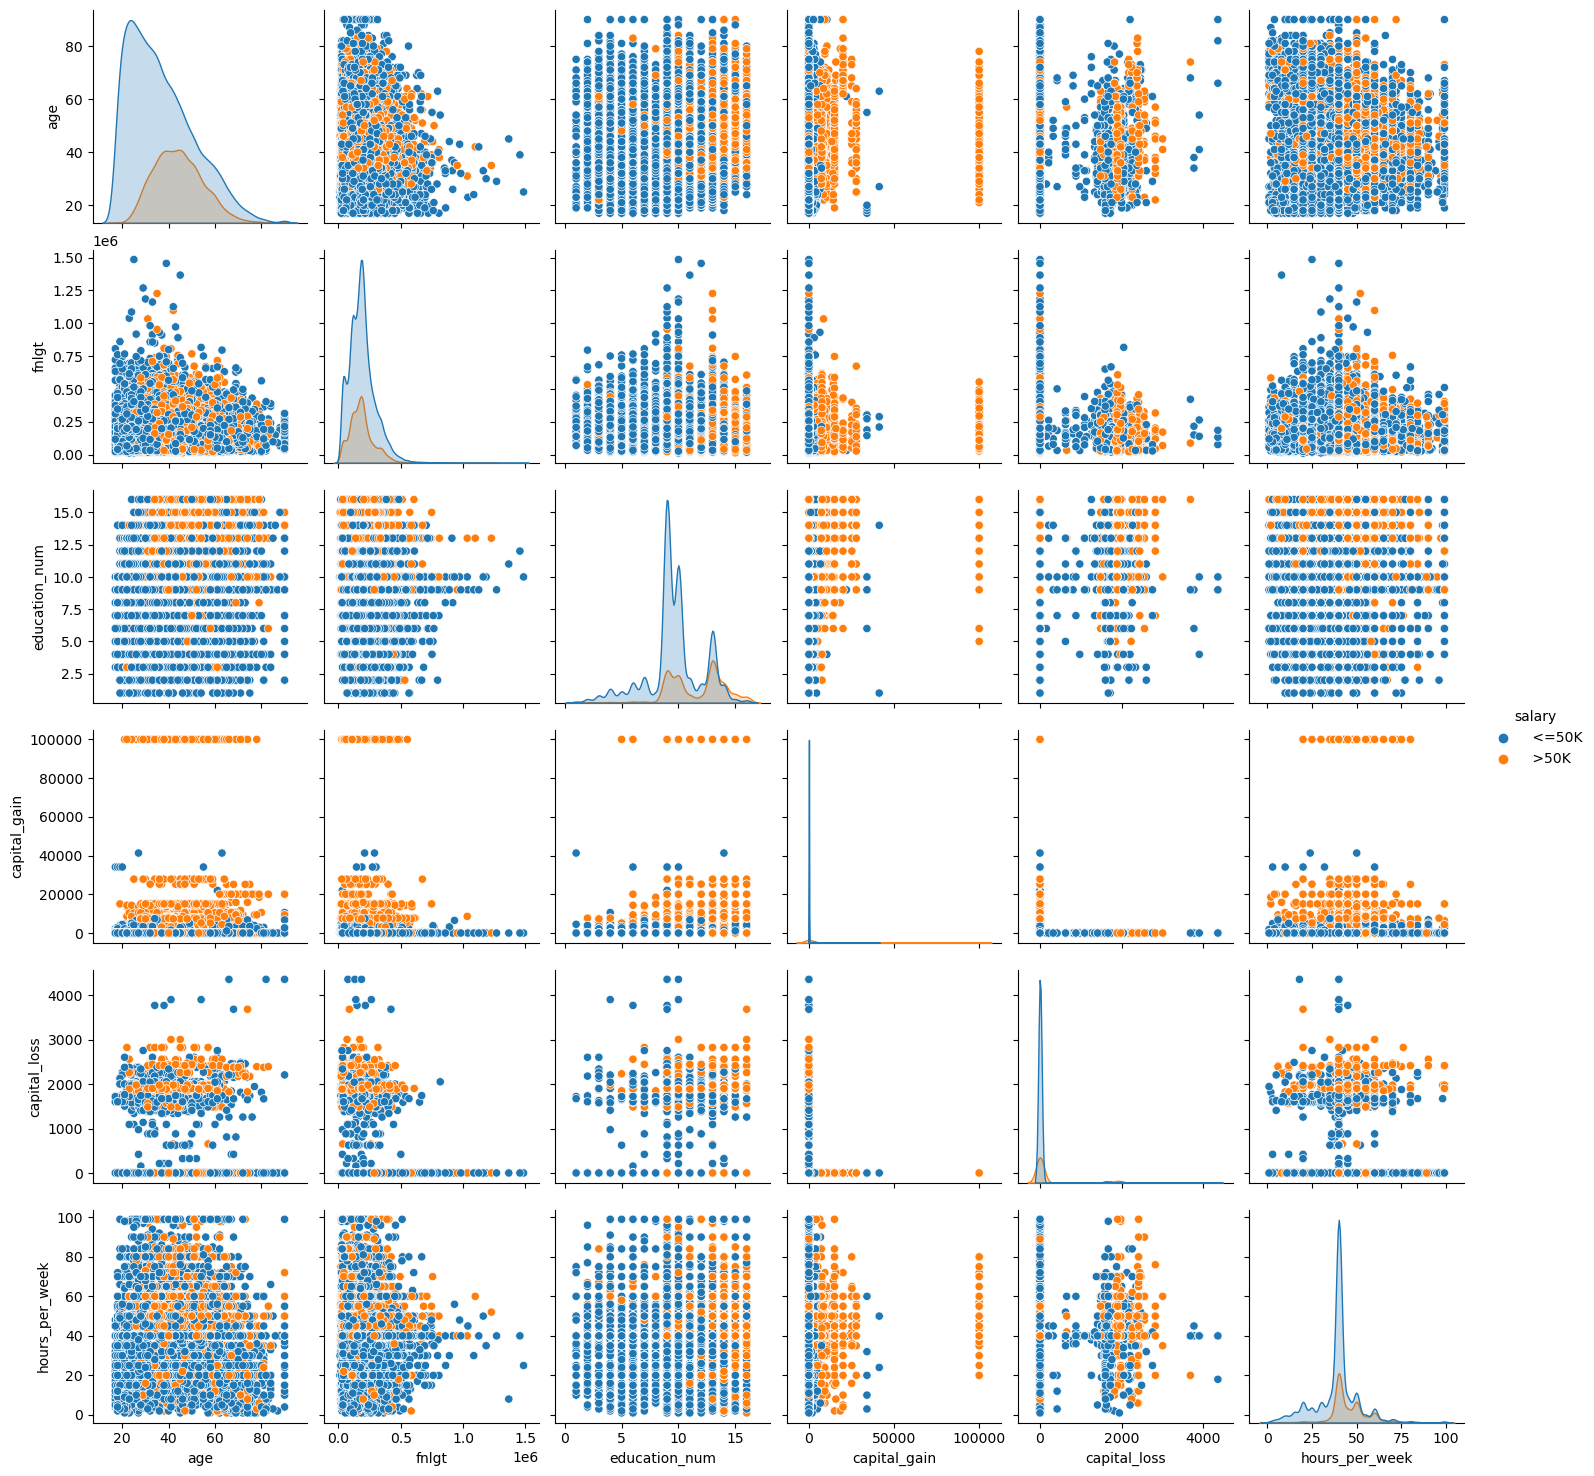

In [21]:
# Seaborn pair plot
sns.pairplot(df, hue='salary');

Not entirely sure what fnlgt is, but it seems to have signal, so lets keep it. There also seems to be substantial signal in a number of the columns such as age, education-num, etc.

## Meta Information
After running feature importance fnlgt is not important. So, we will drop it. This meta information is being used for asserts to make sure that the data distribution is not changing. If it does, this would necessiate retraining of the model on the updated data.

In [25]:
describe_df = df.describe()
# Drop fnlgt from the describe dataframe
describe_df.drop('fnlgt', axis = 1, inplace=True)
display(describe_df)
describe_df.to_csv('data/describe_cleaned_data.csv')

,age,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,10.081815,1078.443741,87.368227,40.440329
std,13.637984,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000
